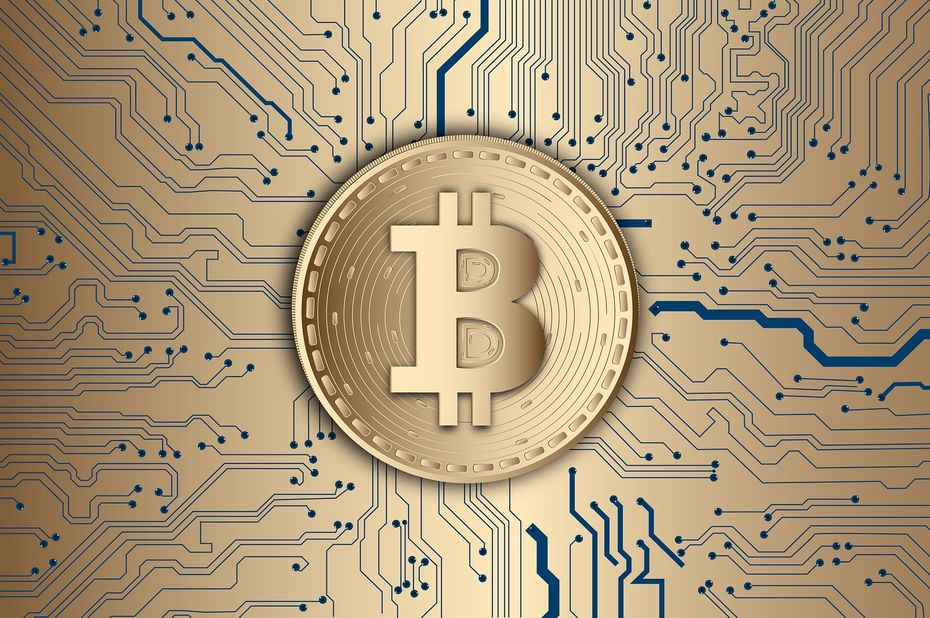

In [55]:
import pandas as pd
import numpy as np
from datetime import datetime
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputRegressor

In [3]:
crypto_df=pd.read_csv('/content/drive/MyDrive/14_NEW PROJECT CRYPTO/gresearch_crypto/train.csv')

In [4]:
crypto_df.head(10)

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,1514764860,2,40.0,2376.580000,2399.5000,2357.1400,2374.590000,19.233005,2373.116392,-0.004218
1,1514764860,0,5.0,8.530000,8.5300,8.5300,8.530000,78.380000,8.530000,-0.014399
2,1514764860,1,229.0,13835.194000,14013.8000,13666.1100,13850.176000,31.550062,13827.062093,-0.014643
3,1514764860,5,32.0,7.659600,7.6596,7.6567,7.657600,6626.713370,7.657713,-0.013922
4,1514764860,7,5.0,25.920000,25.9200,25.8740,25.877000,121.087310,25.891363,-0.008264
5,1514764860,6,173.0,738.302500,746.0000,732.5100,738.507500,335.987856,738.839291,-0.004809
6,1514764860,9,167.0,225.330000,227.7800,222.9800,225.206667,411.896642,225.197944,-0.009791
7,1514764860,11,7.0,329.090000,329.8800,329.0900,329.460000,6.635710,329.454118,NaN
8,1514764920,2,53.0,2374.553333,2400.9000,2354.2000,2372.286667,24.050259,2371.434498,-0.004079
9,1514764920,0,7.0,8.530000,8.5300,8.5145,8.514500,71.390000,8.520215,-0.015875



Les deux premières colonnes définissent les index de temps et d'actifs pour cette ligne de données. Les 6 colonnes du milieu sont des colonnes de caractéristiques avec les données de trading pour cet actif et une minute dans le temps. La dernière colonne est la cible de prédiction

Nous affichons également les informations sur les actifs, y compris la liste de tous les actifs, **le mappage Asset_ID vers les actifs et le poids de chaque actif utilisé pour peser leur importance relative dans la métrique d'évaluation**

**timestamp**: All timestamps are returned as second Unix timestamps (the number of seconds elapsed since 1970-01-01 00:00:00.000 UTC). Timestamps in this dataset are multiple of 60, indicating minute-by-minute data

**Asset_ID**: The asset ID corresponding to one of the crytocurrencies (e.g. Asset_ID = 1 for Bitcoin). The mapping from Asset_ID to crypto asset is contained in asset_details.csv

**Count**: Total number of trades in the time interval (last minute)

**Open**: Opening price of the time interval (in USD)

**High**: Highest price reached during time interval (in USD)

**Low**: Lowest price reached during time interval (in USD)

**Close**: Closing price of the time interval (in USD)

**Volume**: Quantity of asset bought or sold, displayed in base currency USD

**VWAP**: The average price of the asset over the time interval, weighted by volume. VWAP is an aggregated form of trade data

**Target**: Residual log-returns for the asset over a 15 minute horizon

In [5]:
asset_details = pd.read_csv('/content/drive/MyDrive/14_NEW PROJECT CRYPTO/gresearch_crypto/asset_details.csv')
asset_details

,Asset_ID,Weight,Asset_Name
0,2,2.397895,Bitcoin Cash
1,0,4.304065,Binance Coin
2,1,6.779922,Bitcoin
3,5,1.386294,EOS.IO
4,7,2.079442,Ethereum Classic
5,6,5.894403,Ethereum
6,9,2.397895,Litecoin
7,11,1.609438,Monero
8,13,1.791759,TRON
9,12,2.079442,Stellar


## **Graphiques en chandeliers**
Le format des données de trading est une forme agrégée de données de marché, y compris pour l'ouverture, le haut, le bas et la clôture. Nous pouvons visualiser ces données à travers le graphique à barres en chandelier couramment utilisé, qui permet aux traders d'effectuer une analyse technique sur les valeurs intrajournalières. La longueur du corps de la barre représente la fourchette de prix entre l'ouverture et la clôture de la négociation de ce jour. Lorsque la barre est rouge, cela signifie que la clôture était inférieure à l'ouverture, et verte dans le cas contraire. Ceux-ci sont également appelés chandeliers haussiers et baissiers. Les mèches au-dessus et au-dessous des barres montrent les prix haut et bas du trading de cet intervalle.

In [6]:
btc = crypto_df[crypto_df["Asset_ID"]==1].set_index("timestamp") # Asset_ID = 1 for Bitcoin
btc_mini = btc.iloc[-100:] # Select recent data rows

In [7]:
eth = crypto_df[crypto_df["Asset_ID"]==6].set_index("timestamp") # Asset_ID = 6 for Ethereum
eth_mini = eth.iloc[-100:] # Select recent data rows

In [8]:
iot = crypto_df[crypto_df["Asset_ID"]==8].set_index("timestamp") # Asset_ID = 8 for IOTA
iot_mini = iot.iloc[-100:] # Select recent data rows

In [9]:
fig = go.Figure(data=[go.Candlestick(x=btc_mini.index, open=btc_mini['Open'], high=btc_mini['High'], low=btc_mini['Low'], close=btc_mini['Close'])])
fig.update_layout(
    title=go.layout.Title(
        text="BITCOINS <br><sup>DISTRIBUTION</sup>",
        xref="paper",
        x=0
    ),
        xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text="Evolution BITCOINS</sup>"
            )
        )
    )
fig.show()

In [10]:
fig = go.Figure(data=[go.Candlestick(x=eth_mini.index, open=eth_mini['Open'], high=eth_mini['High'], low=eth_mini['Low'], close=eth_mini['Close'])])
fig.update_layout(
    title=go.layout.Title(
        text="ETHEREUM <br><sup>DISTRIBUTION</sup>",
        xref="paper",
        x=0
    ),
        xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text="Evolution ETHEREUM</sup>"
            )
        )
    )
fig.show()

In [11]:
fig = go.Figure(data=[go.Candlestick(x=iot_mini.index, open=iot_mini['Open'], high=iot_mini['High'], low=iot_mini['Low'], close=iot_mini['Close'])])
fig.update_layout(
    title=go.layout.Title(
        text="IOTA <br><sup>DISTRIBUTION</sup>",
        xref="paper",
        x=0
    ),
        xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text="Evolution IOTA</sup>"
            )
        )
    )
fig.show()

In [12]:
#Preprocessing
# missing data

In [13]:
btc.head(1)

,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
timestamp,,,,,,,,,
1514764860,1,229.0,13835.194,14013.8,13666.11,13850.176,31.550062,13827.062093,-0.014643


In [14]:
eth.head(1)

,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
timestamp,,,,,,,,,
1514764860,6,173.0,738.3025,746.0,732.51,738.5075,335.987856,738.839291,-0.004809


In [15]:
iot.head(1)

,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
timestamp,,,,,,,,,
1525853220,8,20.0,2.2652,2.2653,2.263,2.263,1095.2361,2.263346,0.001105


In [16]:
print(btc.isna().sum())
print(eth.isna().sum())
print(iot.isna().sum())

Asset_ID      0
Count         0
Open          0
High          0
Low           0
Close         0
Volume        0
VWAP          0
Target      304
dtype: int64
Asset_ID      0
Count         0
Open          0
High          0
Low           0
Close         0
Volume        0
VWAP          0
Target      340
dtype: int64
Asset_ID         0
Count            0
Open             0
High             0
Low              0
Close            0
Volume           0
VWAP             0
Target      193106
dtype: int64


In [17]:
# Vérifions la plage de temps pour les données Bitcoin , Ethereum + iota, en utilisant la conversion de timestamp en datetime

In [18]:
start_btc = btc.index[0].astype('datetime64[s]')
end_btc = btc.index[-1].astype('datetime64[s]')
start_eth = eth.index[0].astype('datetime64[s]')
end_eth = eth.index[-1].astype('datetime64[s]')
start_iot = iot.index[0].astype('datetime64[s]')
end_iot = iot.index[-1].astype('datetime64[s]')

In [19]:
print('BTC data goes from ', start_btc, 'to ', end_btc)
print('Ethereum data goes from ', start_eth, 'to ', end_eth)
print('iota data goes from ', start_iot, 'to ', end_iot)

BTC data goes from  2018-01-01T00:01:00 to  2021-09-21T00:00:00
Ethereum data goes from  2018-01-01T00:01:00 to  2021-09-21T00:00:00
iota data goes from  2018-05-09T08:07:00 to  2021-09-21T00:00:00


In [20]:
# vérification de la différence de timestamp entre les lignes consécutives pour voir s'il manque des données.

In [21]:
(eth.index[1:]-eth.index[:-1]).value_counts().head(10)

60      1956043
120         100
180          23
300           5
540           4
240           3
360           2
600           2
480           2
3120          1
Name: timestamp, dtype: int64

In [22]:
(btc.index[1:]-btc.index[:-1]).value_counts().head(10)

60     1956136
120         78
180         12
240         11
420          9
600          4
360          4
720          3
480          3
840          3
Name: timestamp, dtype: int64

In [23]:
(iot.index[1:]-iot.index[:-1]).value_counts().head(10)

60     1484329
120      70201
180      21250
240       8405
300       3815
360       1802
420        925
480        544
540        321
600        156
Name: timestamp, dtype: int64

In [24]:
# IMPORTANT : présence xx lacunes dans les données. Pour travailler avec la plupart des modèles de séries chronologiques, nous devons prétraiter nos données dans un format sans intervalle de temps. 
# Pour combler les lacunes, nous pouvons utiliser la méthode .reindex() pour le remplissage avancé, en comblant les lacunes avec la valeur valide précédente.

In [25]:
eth = eth.reindex(range(eth.index[0],eth.index[-1]+60,60),method='pad') # pad / ffill: Propagate last valid observation forward to next valid
(eth.index[1:]-eth.index[:-1]).value_counts().head(10)

60    1956959
Name: timestamp, dtype: int64

In [26]:
btc = btc.reindex(range(btc.index[0],btc.index[-1]+60,60),method='pad')
(btc.index[1:]-btc.index[:-1]).value_counts().head(10)

60    1956959
Name: timestamp, dtype: int64

In [27]:
iot = iot.reindex(range(iot.index[0],iot.index[-1]+60,60),method='pad')
(iot.index[1:]-iot.index[:-1]).value_counts().head(10)

60    1772153
Name: timestamp, dtype: int64

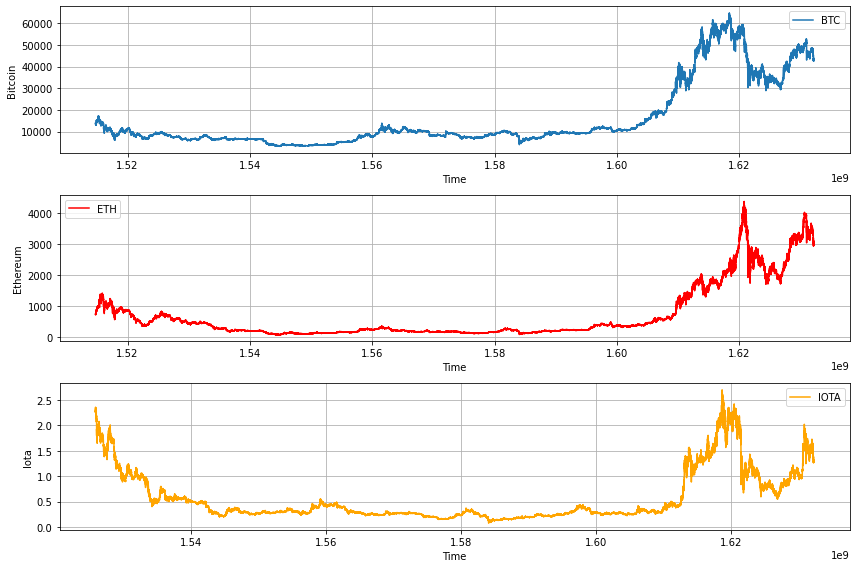

In [28]:
#Data visualisation
# plot vwap time series for both chosen assets
f = plt.figure(figsize=(12,8))
# fill missing values for BTC
btc = btc.reindex(range(btc.index[0],btc.index[-1]+60,60),method='pad') #pad / ffill: Propagate last valid observation forward to next valid
ax = f.add_subplot(311)
plt.plot(btc['Close'], label='BTC')
plt.legend()
plt.grid(True)
plt.xlabel('Time')
plt.ylabel('Bitcoin')
ax2 = f.add_subplot(312)
ax2.plot(eth['Close'], color='red', label='ETH')
plt.legend()
plt.grid(True)
plt.xlabel('Time')
plt.ylabel('Ethereum')
ax2 = f.add_subplot(313)
ax2.plot(iot['Close'], color='orange', label='IOTA')
plt.legend()
plt.grid(True)
plt.xlabel('Time')
plt.ylabel('Iota')
plt.tight_layout()
plt.show()

In [29]:
# Fonction auxiliaire, from datetime to timestamp
totimestamp = lambda s: np.int32(time.mktime(datetime.strptime(s, "%d/%m/%Y").timetuple())) # time.mktime()La méthode du module Time est utilisée pour convertir un objet time.struct_time ou un tuple contenant 9 éléments correspondant à l' objet time.struct_time 
# en temps en secondes écoulé depuis l'époque en heure locale
# creation d'intervalles
btc_mini_2021 = btc.loc[totimestamp('01/06/2021'):totimestamp('01/09/2021')]
eth_mini_2021 = eth.loc[totimestamp('01/06/2021'):totimestamp('01/09/2021')]
iot_mini_2021 = iot.loc[totimestamp('01/06/2021'):totimestamp('01/09/2021')]

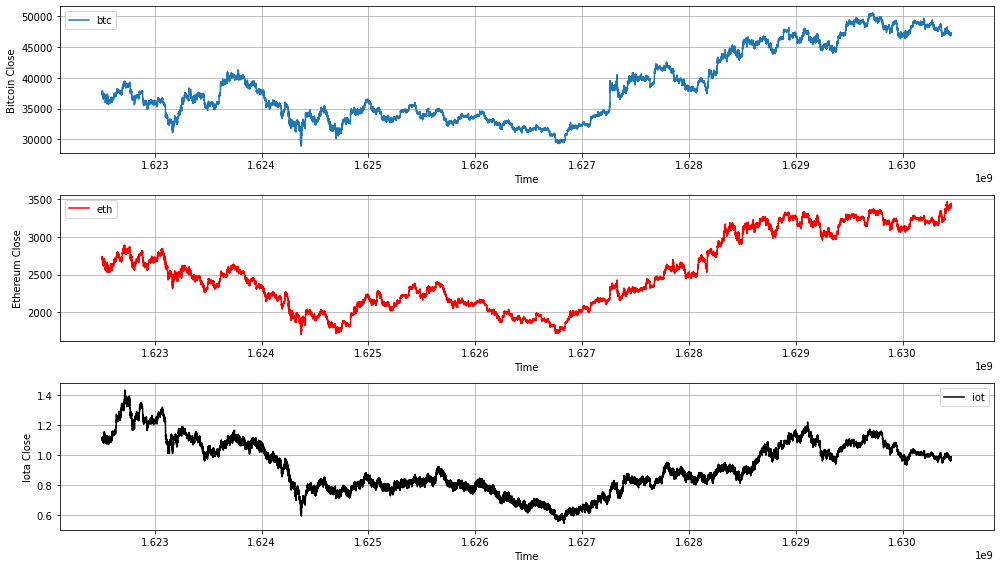

In [30]:
# plot time series for both chosen assets
f = plt.figure(figsize=(14,8))
ax = f.add_subplot(311)
plt.plot(btc_mini_2021['Close'], label='btc')
plt.legend()
plt.grid(True)
plt.xlabel('Time')
plt.ylabel('Bitcoin Close')
ax2 = f.add_subplot(312)
ax2.plot(eth_mini_2021['Close'], color='red', label='eth')
plt.legend()
plt.grid(True)
plt.xlabel('Time')
plt.ylabel('Ethereum Close')
ax3 = f.add_subplot(313)
ax3.plot(iot_mini_2021['Close'], color='black', label='iot')
plt.legend()
plt.grid(True)
plt.xlabel('Time')
plt.ylabel('Iota Close')
plt.tight_layout()
plt.show()

In [31]:
# Sur des intervalles plus courts, nous pouvons voir visuellement une corrélation potentielle entre les 3 crypto monnaies, avec des hauts et des bas quasi simultanés. 
# Un meilleur format pour analyser de tels mouvements consiste à calculer les rendements des actifs.

In [32]:
# LOG RETURN
# Afin d'analyser les variations de prix d'un actif, nous pouvons traiter la différence de prix. Cependant, différents actifs présentent des échelles de prix différentes,
# de sorte que leurs rendements ne sont pas facilement comparables. Nous pouvons résoudre ce problème en calculant plutôt le pourcentage de variation du prix, également appelé rendement.
# Ce rendement coïncide avec la variation en pourcentage de notre capital investi.

# Les rendements sont largement utilisés en finance, mais les rendements log sont préférés pour la modélisation mathématique des séries chronologiques, car ils s'additionnent dans le temps. 
# De plus, bien que les retours réguliers ne puissent pas descendre en dessous de -100 %, les retours de journaux ne sont pas limités.

# Pour calculer le LOG RETURN, on peut simplement prendre le logarithme du rapport entre deux prix consécutifs. La première ligne aura un retour vide car la valeur précédente est inconnue, donc le point de données de retour vide sera supprimé.

In [33]:
def log_return(series, periods=1):
    return np.log(series).diff(periods=periods) #Calculates the difference of a Series element compared with another element in the Series (default is element in previous row).

In [34]:
import scipy.stats as stats
# Log Return est l'une des trois méthodes de calcul du rendement et suppose que les rendements sont composés en continu plutôt que sur plusieurs sous-périodes
# Il est calculé en prenant le logarithme naturel de la valeur de fin divisé par la valeur de début
lret_eth = log_return(eth_mini_2021.Close)[1:]
lret_btc = log_return(btc_mini_2021.Close)[1:] 
lret_iot = log_return(iot_mini_2021.Close)[1:]
lret_btc.rename('lret_btc', inplace=True)
lret_eth.rename('lret_eth', inplace=True)
lret_iot.rename('lret_iot', inplace=True)
#plt.figure(figsize=(12,6))
#plt.plot(lret_btc);
#plt.plot(lret_eth);
#plt.plot(lret_iot);
#plt.show()

timestamp
1622505660   -0.001674
1622505720    0.006186
1622505780   -0.000630
1622505840    0.000000
1622505900    0.001710
                ...   
1630454160   -0.000051
1630454220   -0.001418
1630454280   -0.000659
1630454340   -0.001167
1630454400    0.000000
Name: lret_iot, Length: 132480, dtype: float64

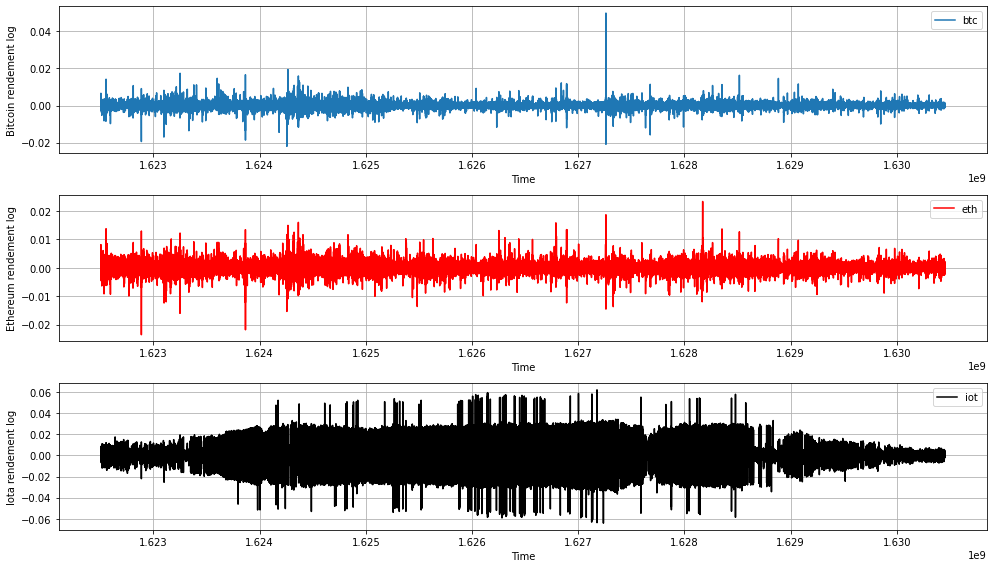

In [35]:
f = plt.figure(figsize=(14,8))
ax = f.add_subplot(311)
plt.plot(lret_btc, label='btc')
plt.legend()
plt.grid(True)
plt.xlabel('Time')
plt.ylabel('Bitcoin rendement log')
ax2 = f.add_subplot(312)
ax2.plot(lret_eth, color='red', label='eth')
plt.legend()
plt.grid(True)
plt.xlabel('Time')
plt.ylabel('Ethereum rendement log')
ax3 = f.add_subplot(313)
ax3.plot(lret_iot, color='black', label='iot')
plt.legend()
plt.grid(True)
plt.xlabel('Time')
plt.ylabel('Iota rendement log')
plt.tight_layout()
plt.show()

In [36]:
# Corrélation entre les actifs
# Nous avons émis l'hypothèse avant que les rendements des actifs cryptographiques puissent présenter une certaine corrélation
# Nous pouvons vérifier comment la corrélation entre Bitcoin, Ethereum & Iota évolue dans le temps pour la période 2021 que nous avons sélectionnée (1er Juin au 1er Septembre 2021)

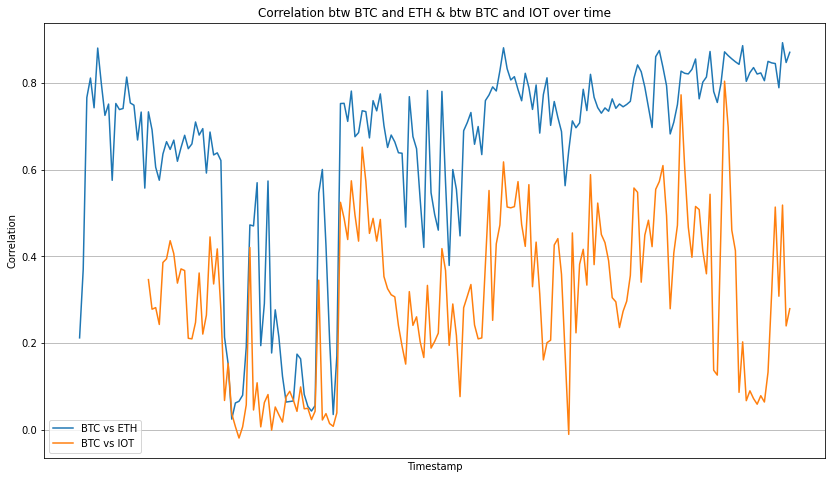

In [37]:
# join 3 assets
lret_btc_long = log_return(btc.Close)[1:]
lret_eth_long = log_return(eth.Close)[1:]
lret_iot_long = log_return(iot.Close)[1:]
lret_btc_long.rename('lret_btc', inplace=True)
lret_eth_long.rename('lret_eth', inplace=True)
lret_iot_long.rename('lret_iot', inplace=True)
three_assets = pd.concat([lret_btc_long, lret_eth_long, lret_iot_long], axis=1)
# regrouper des lignes consécutives et utilisation de .corr() pour la correlation entre colonnes
corr_time_1 = three_assets.groupby(three_assets.index//(10000*60)).corr().loc[:,"lret_btc"].loc[:,"lret_eth"]
corr_time_2 = three_assets.groupby(three_assets.index//(10000*60)).corr().loc[:,"lret_btc"].loc[:,"lret_iot"]
plt.title("Correlation btw BTC and ETH & btw BTC and IOT over time");
corr_time_1.plot(label="BTC vs ETH",figsize=(14, 8));
corr_time_2.plot(label="BTC vs IOT");
plt.xticks([])
plt.grid(True)
plt.xlabel("Timestamp")
plt.ylabel("Correlation")
plt.legend();

In [38]:
# OBSERVATIONS :
# forte correlation entre BTC et ETH
# c'est moins vrai pour la correlation entre BTC & IOT

In [39]:
three_assets.sample(5)

,lret_btc,lret_eth,lret_iot
1578905400,0.000140,-0.000600,-0.001060
1594514040,0.000197,0.000314,0.001193
1579628460,0.000471,-0.000120,0.000000
1619794500,-0.002042,-0.002050,-0.001580
1520865360,0.002005,-0.000490,NaN


In [40]:
# la corrélation élevée mais variable entre BTC & ETH. Ici, nous pouvons voir qu'il y a une dynamique changeante au fil du temps, et cela serait essentiel pour ce défi de série chronologique, c'est-à-dire comment effectuer des prévisions dans un environnement hautement non stationnaire.

# Un comportement stationnaire d'un système ou d'un processus est caractérisé par des propriétés statistiques non changeantes dans le temps telles que la moyenne, la variance et l'autocorrélation. D'autre part, un comportement non stationnaire est caractérisé par un changement continu des propriétés statistiques au cours du temps. 

# La stationnarité est importante car de nombreux outils analytiques utiles et des tests et modèles statistiques en dépendent.

# Nous pouvons également vérifier la corrélation entre tous les actifs en visualisant la matrice de corrélation. Notez comment certains actifs ont une corrélation par paires beaucoup plus élevée que d'autres.

In [41]:
# create dataframe with returns for all assets
all_assets_2021 = pd.DataFrame([])
for i, j in zip(asset_details.Asset_ID, asset_details.Asset_Name):
  asset = crypto_df[crypto_df["Asset_ID"]==i].set_index("timestamp")
  asset = asset.loc[totimestamp('01/01/2021'):totimestamp('01/09/2021')]
  asset = asset.reindex(range(asset.index[0],asset.index[-1]+60,60),method='pad') #pad / ffill: Propagate last valid observation forward to next valid
  lret = log_return(asset.Close.fillna(0))[1:]
  all_assets_2021 = all_assets_2021.join(lret, rsuffix=j, how="outer")

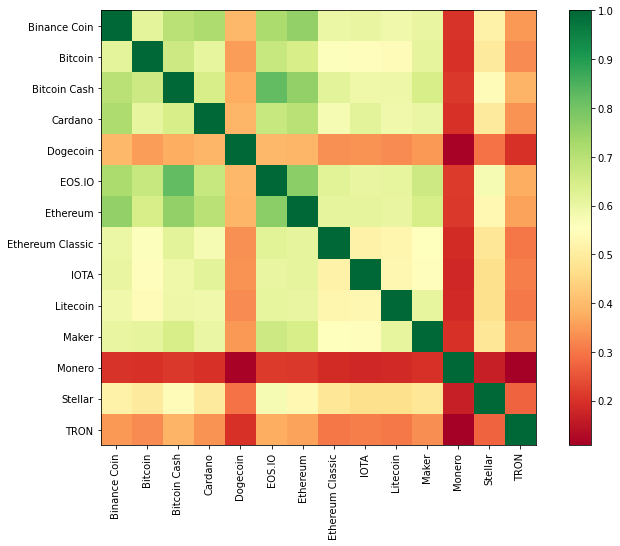

In [42]:
plt.figure(figsize=(12,8))
plt.imshow(all_assets_2021.corr(),cmap="RdYlGn");
plt.yticks(asset_details['Asset_ID'].values, asset_details['Asset_Name'].values);
plt.xticks(asset_details['Asset_ID'].values, asset_details['Asset_Name'].values, rotation='vertical');
plt.colorbar();

In [43]:
# Construction du modèle de prédiction
# Cibles de prédiction et évaluation

In [44]:
# cette étude vise à prédire les rendements dans un avenir proche des prix Pa , pour chaque actif a . 
# Pour chaque ligne de l'ensemble de données, nous incluons la cible pour la prédiction, Target. La cible est dérivée des retours de log ( Ra ) sur 15 minutes
# Les rendements des actifs cryptographiques sont fortement corrélés, suivant dans une large mesure le marché global de la cryptographie. Comme nous voulons tester votre capacité à prédire les rendements d'actifs individuels
# Nous effectuons une résidualisation linéaire, en supprimant le signal de marché des rendements d'actifs individuels lors de la création de la cible
# où la parenthèse .⟩ représente la moyenne mobile au fil du temps (fenêtres de 3 750 minutes), et les mêmes pondérations d'actifs ont été utilisées pour la métrique d'évaluation.
# Certaines lignes ont des valeurs nulles pour les cibles en raison de valeurs manquantes dans les prix futurs. Les lignes avec des valeurs NULL dans la vérité terrain de l'ensemble de test sont ignorées à des fins de notation.
# Dans la compétition, vos prédictions seront évaluées sur une version pondérée du coefficient de corrélation de Pearson, avec des pondérations données par la colonne Pondération dans le fichier Asset Details.

# POUR LA SUITE -> nous allons simplifier les choses et utiliser la corrélation (sans pondération) pour l'évaluation, et ne considérerons que deux actifs, BTC et ETH.

image.png

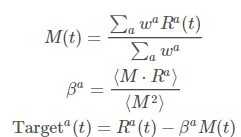

In [45]:
# Conception de fonctionnalités
# Nous concevons d'abord quelques caractéristiques pertinentes à entrer dans notre modèle

In [46]:
asset.head()

,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
timestamp,,,,,,,,,
1609459260,4,84.0,0.004671,0.004683,0.004668,0.004677,2.202482e+06,0.004675,-0.008679
1609459320,4,23.0,0.004683,0.004686,0.004669,0.004672,6.446365e+05,0.004676,-0.006432
1609459380,4,11.0,0.004670,0.004676,0.004668,0.004672,5.196483e+05,0.004671,-0.006881
1609459440,4,38.0,0.004675,0.004682,0.004667,0.004672,7.038264e+05,0.004672,-0.007622
1609459500,4,19.0,0.004670,0.004674,0.004668,0.004671,4.305936e+05,0.004670,-0.007321


In [47]:
# Select some input features from the trading data: 
# 5 min log return, abs(5 min log return), upper shadow, and lower shadow.
upper_shadow = lambda asset: asset.High - np.maximum(asset.Close,asset.Open) # amplitude sup
lower_shadow = lambda asset: np.minimum(asset.Close,asset.Open)- asset.Low  # amplitude inf

X_btc = pd.concat([log_return(btc.VWAP,periods=5), log_return(btc.VWAP,periods=1).abs(), upper_shadow(btc), lower_shadow(btc)], axis=1)
y_btc = btc.Target

X_eth = pd.concat([log_return(eth.VWAP,periods=5), log_return(eth.VWAP,periods=1).abs(), upper_shadow(eth), lower_shadow(eth)], axis=1)
y_eth = eth.Target

In [48]:
# Préparation des données pour construire des modèles prédictifs
# séparation des ensembles d'entraînement et de test. Pour ce faire, nous calculerons X et y et diviserons ces données en fractionnements d'entraînement et de test
# IMPORTANT : la division de test représente une partie ultérieure des données, comme cela est généralement fait dans les séries chronologiques

In [49]:
# select training and test periods
train_window = [totimestamp("01/01/2021"), totimestamp("30/05/2021")]
test_window = [totimestamp("01/06/2021"), totimestamp("30/08/2021")]

# divide data into train and test, compute X and y
# we aim to build simple regression models using a window_size of 1
X_btc_train = X_btc.loc[train_window[0]:train_window[1]].fillna(0).to_numpy()  # filling NaN's with zeros
y_btc_train = y_btc.loc[train_window[0]:train_window[1]].fillna(0).to_numpy()  

X_btc_test = X_btc.loc[test_window[0]:test_window[1]].fillna(0).to_numpy() 
y_btc_test = y_btc.loc[test_window[0]:test_window[1]].fillna(0).to_numpy() 

X_eth_train = X_eth.loc[train_window[0]:train_window[1]].fillna(0).to_numpy()  
y_eth_train = y_eth.loc[train_window[0]:train_window[1]].fillna(0).to_numpy()  

X_eth_test = X_eth.loc[test_window[0]:test_window[1]].fillna(0).to_numpy() 
y_eth_test = y_eth.loc[test_window[0]:test_window[1]].fillna(0).to_numpy() 

In [50]:
# simple preprocessing of the data 
scaler = StandardScaler()

X_btc_train_scaled = scaler.fit_transform(X_btc_train)
X_btc_test_scaled = scaler.transform(X_btc_test)

X_eth_train_scaled = scaler.fit_transform(X_eth_train)
X_eth_test_scaled = scaler.transform(X_eth_test)

In [53]:
# Modèle basique <=> baseline 
lr = LinearRegression()
lr.fit(X_btc_train_scaled,y_btc_train)
y_pred_lr_btc = lr.predict(X_btc_test_scaled)

lr.fit(X_eth_train_scaled,y_eth_train)
y_pred_lr_eth = lr.predict(X_eth_test_scaled)

In [58]:
# Modèle + complexe (multiple output regression model)
# we concatenate X and y for both assets
X_dual_train = np.concatenate((X_btc_train_scaled, X_eth_train_scaled), axis=1)
X_dual_test = np.concatenate((X_btc_test_scaled, X_eth_test_scaled), axis=1)
y_dual_train = np.column_stack((y_btc_train, y_eth_train))
y_dual_test = np.column_stack((y_btc_test, y_eth_test))

# define the direct multioutput model and fit it
mlr = MultiOutputRegressor(LinearRegression()) #This strategy consists of fitting one regressor per target
lr.fit(X_dual_train,y_dual_train)
y_pred_lr_dual = lr.predict(X_dual_test)

In [ ]:
# Évaluer les lignes de base
# La mesure de la performance en compétition est la corrélation pondérée. Cependant, pour l'instant, nous utiliserons une simple corrélation pour évaluer les deux modèles de base construits

In [60]:
print('Test score for LR baseline: BTC', f"{np.corrcoef(y_pred_lr_btc, y_btc_test)[0,1]:.2f}", 
                                ', ETH', f"{np.corrcoef(y_pred_lr_eth, y_eth_test)[0,1]:.2f}")
print('Test score for multiple output LR baseline: BTC', f"{np.corrcoef(y_pred_lr_dual[:,0], y_btc_test)[0,1]:.2f}", 
                                                ', ETH', f"{np.corrcoef(y_pred_lr_dual[:,1], y_eth_test)[0,1]:.2f}")

Test score for LR baseline: BTC -0.01 , ETH -0.01
Test score for multiple output LR baseline: BTC -0.01 , ETH 0.01
